SalePrice               1.000000
OverallQual             0.790982
GrLivArea               0.708624
GarageCars              0.640409
GarageArea              0.623431
TotalBsmtSF             0.613581
1stFlrSF                0.605852
ExterQual_TA            0.589044
FullBath                0.560664
BsmtQual_Ex             0.553105
TotRmsAbvGrd            0.533723
YearBuilt               0.522897
KitchenQual_TA          0.519298
GarageFinish_Unf        0.513906
YearRemodAdd            0.507101
KitchenQual_Ex          0.504094
BsmtQual_TA             0.498545
Foundation_PConc        0.497734
MasVnrArea              0.472614
Fireplaces              0.466929
GarageYrBlt             0.466754
ExterQual_Gd            0.452466
ExterQual_Ex            0.451164
BsmtFinType1_GLQ        0.434597
HeatingQC_Ex            0.434543
GarageFinish_Fin        0.419678
Neighborhood_NridgHt    0.402149
BsmtFinSF1              0.386420
MasVnrType_None         0.367456
SaleType_New            0.357509
          

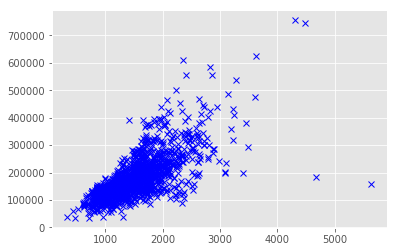

In [36]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sys import stdout
from sklearn.model_selection import train_test_split
import math
from sklearn.decomposition import PCA 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
plt.style.use('ggplot')
%matplotlib inline
def rmsle(y_true, y_pred):
   assert len(y_true) == len(y_pred)
   return np.square(np.log(y_pred + 1) - np.log(y_true + 1)).mean() ** 0.5
data = pd.read_csv('C:/Users/User/Desktop/train.csv',  na_values='?')
#print (data.head(1460))
plt.plot(data['GrLivArea'], data['SalePrice'], 'bx')
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
#заполнение нулевых значений
#для числовых
data = data.fillna(data.median(axis=0), axis=0)
#Для категориальных
data_describe = data.describe(include=[object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

#data.count(axis=0)
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]

#избавление от бинарных категориальных признаков
for c in binary_columns:
    top = data_describe[c]['top']
    top_items = data[c] == top
    data.loc[top_items, c] = 0
    data.loc[np.logical_not(top_items), c] = 1
#data[binary_columns].describe()
#избавление от не бинарных категориальных признаков
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
#print (data_nonbinary.columns)

#нормализация 
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()
data_numerical.describe()
#все в одну таблицу
data = pd.concat((data_numerical, data[binary_columns], data_nonbinary), axis=1)
data = pd.DataFrame(data, dtype=float)
#print (data.shape)
#print (data.columns)

data.corr()['SalePrice'].abs().sort_values(ascending=False)

#data.corr()
#полученные значения корреляции
#рассмотрим первые несколько значений




In [2]:
data=data[['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','ExterQual_TA',
           'FullBath','BsmtQual_Ex','YearBuilt','KitchenQual_TA','YearRemodAdd', 'KitchenQual_Ex']]
data
#выделение X и Y
X = data.drop(('SalePrice'), axis=1)  # Выбрасываем столбец 'SalePrice'.
y = data['SalePrice']
#print(X)
#print(Y)
feature_names = X.columns
#print (feature_names)
#print (X.shape)
#print (y.shape)
N, d = X.shape
#разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 11)
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print (N_train, N_test)
#библиотечная регрессия
lr = LinearRegression() 
lr.fit(X_train, y_train)
print('mean_absolute_error by sklearn = ', mean_absolute_error(y_test, lr.predict(X_test)))
print('rmse =', rmsle(y_test, lr.predict(X_test)))

949 511
mean_absolute_error by sklearn =  0.28196266089036315
rmse = 0.5443530804154302


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log


In [34]:
#метод главных вектооров
pca = PCA(n_components=11)
XPCAredused = pca.fit_transform(X)
def predict_outcome(feature_matrix, weights): 
    weights=np.array(weights) 
    predictions = np.dot(feature_matrix, weights) 
    return predictions 

def errors(output,predictions): 
    errors=predictions-output 
    return errors 

def feature_derivative(errors, feature): 
    derivative=np.dot(2,np.dot(feature,errors)) 
    return derivative 


def regression_gradient_descent(feature_matrix, output, initial_weights, step_size, tolerance): 
    converged = False 
    #Начальные веса преобразуются в массив numpy 
    weights = np.array(initial_weights) 
    while not converged: 
        # вычислить прогнозы на основе feature_matrix и весов: 
        predictions=predict_outcome(feature_matrix,weights) 
        # вычислять ошибки как predictions - output: 
        error=errors(output,predictions) 
        gradient_sum_squares = 0 # инициализирование градиента 
        # пока не сходится, обновлять каждый вес отдельно: 
        for i in range(len(weights)): 
            # Вызов feature_matrix[:, i] если столбец фич связан с весами[i] 
            feature=feature_matrix[:, i] 
            deriv=feature_derivative(error,feature) 
            # добавить квадратную производную к величине градиента 
            gradient_sum_squares=gradient_sum_squares+(deriv**2) 
            # обновить вес на основе размера шага и производной: 
            weights[i]=weights[i] - np.dot(step_size,deriv) 

        gradient_magnitude = math.sqrt(gradient_sum_squares) 
        #stdout.write("\r%d" % int(gradient_magnitude)) 
        stdout.flush() 
        if gradient_magnitude < tolerance: 
            converged = True 
    return(weights) 

simple_feature_matrix = XPCAredused 
output = y 
initial_weights = np.array([0.5, 0.07, 0.03, 0.02, 0.02, 0.006, 0.005, 0.004, 0.001, 0.05, 0.8 ]) 
step_size = 0.00001 
tolerance = 2.5e7 
simple_weights = regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, tolerance) 
#print(simple_weights) 

hand_y_train_predict = np.dot(X_train, simple_weights) 
hand_y_test_predict = np.dot(X_test, simple_weights) 

print("hands") 
print("mean_absolute_error : ", mean_absolute_error(y_test, hand_y_test_predict)) 
print("RMSE: ", rmsle(y_test, hand_y_test_predict))

hands
mean_absolute_error :  0.39875969265059785
RMSE:  0.6354293710659771


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log
